### Disaster_Tweet_Voting_Ensemble

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk

In [3]:
from nltk.corpus import stopwords

In [4]:
from nltk.stem import PorterStemmer

In [5]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
import re

In [8]:
train_df = pd.read_csv("disaster-tweets-train.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
test_df = pd.read_csv("disaster-tweets-test.csv")
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [13]:
train_df.shape, test_df.shape

((7613, 5), (3263, 4))

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [15]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [20]:
(train_df['location'].isnull().sum()/len(train_df['location']))*100

33.27203467752528

In [27]:
train_df['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [16]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [28]:
train_df.drop(["location"], axis=1, inplace=True)
test_df.drop(["location"], axis=1, inplace=True)

In [29]:
train_df['keyword']=train_df['keyword'].fillna(train_df['keyword'].value_counts().idxmax())

In [30]:
test_df['keyword'] = test_df['keyword'].fillna(test_df['keyword'].value_counts().idxmax())

In [34]:
print(train_df.isnull().sum())

id         0
keyword    0
text       0
target     0
dtype: int64


In [33]:
print(test_df.isnull().sum())

id         0
keyword    0
text       0
dtype: int64


In [35]:
train_df.head(2)

,id,keyword,text,target
0,1,fatalities,Our Deeds are the Reason of this #earthquake M...,1
1,4,fatalities,Forest fire near La Ronge Sask. Canada,1


In [36]:
train_df['target'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='target', ylabel='count'>

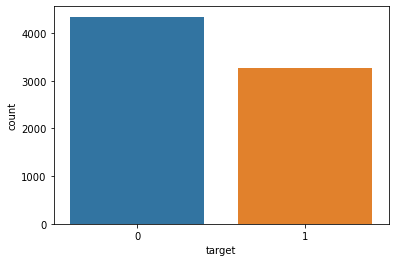

In [37]:
sns.countplot(x=train_df['target'])

In [38]:
# removing id columns from both training and testing dataset, as they have no means to us
train_df.drop(["id"], axis=1, inplace=True)
test_df.drop(["id"], axis=1, inplace=True)

In [39]:
# Remove extra punctuations
train_df["text"].replace("[^a-zA-Z]", " ",regex = True, inplace = True)
test_df["text"].replace("[^a-zA-Z]", " ",regex = True, inplace = True)

In [40]:
# convert all letter to lower case
train_df['text']=train_df['text'].str.lower()

In [41]:
test_df['text']=test_df['text'].str.lower()

In [44]:
stop_words=stopwords.words('english')

In [59]:
# removing stopwords
train_df['text']=train_df['text'].apply(lambda x: x for x in train_df['text'] if x not in stop_words)

TypeError: 'generator' object is not callable

In [47]:
test_df['text'].apply(lambda x: [item for item in x if item not in stop_words])

0       [j, u,  , h, p, p, e, n, e,  ,  , e, r, r, b, ...
1       [h, e, r,  , b, u,  ,  , e, r, h, q, u, k, e, ...
2       [h, e, r, e,  ,  ,  , f, r, e,  , f, r, e,  , ...
3       [p, c, l, p, e,  , l, g, h, n, g,  ,  ,  , p, ...
4       [p, h, n,  , u, e, l, r,  , k, l, l,  ,  ,  , ...
                              ...                        
3258    [e, r, h, q, u, k, e,  , f, e,  , l,  , n, g, ...
3259    [r,  , n,  , r,  , w, r, e,  , h, n,  , l,  , ...
3260    [g, r, e, e, n,  , l, n, e,  , e, r, l, e, n, ...
3261    [e, g,  , u, e,  , h, z, r, u,  , w, e, h, e, ...
3262    [ , c, f, c, l, g, r,  , h,  , c, v, e,  ,  , ...
Name: text, Length: 3263, dtype: object

In [49]:
!pip install wordcloud

In [50]:
from wordcloud import WordCloud

In [52]:
train_df.head(2)

,keyword,text,target
0,fatalities,"[u, r, , e, e, , r, e, , h, e, , r, e, n, ...",1
1,fatalities,"[f, r, e, , f, r, e, , n, e, r, , l, , r, ...",1


In [55]:
train_df.text[0:5]

0    [u, r,  , e, e,  , r, e,  , h, e,  , r, e, n, ...
1    [f, r, e,  , f, r, e,  , n, e, r,  , l,  , r, ...
2    [l, l,  , r, e, e, n,  , k, e,  ,  ,  , h, e, ...
3    [ ,  ,  ,  ,  ,  ,  , p, e, p, l, e,  , r, e, ...
4    [j, u,  , g,  , e, n,  , h,  , p, h,  , f, r, ...
Name: text, dtype: object

In [53]:
X = train_df.drop(['target'],axis = 1)
y = train_df['target']